# Project: Predicting the rating of an app on Google Play Store  

In [ ]:
I have app data which was scraped from Google Play store. I am targeting to predict the rating of an app on Google Play store


Here is the schema of the applications on Google Play dataset, found in `googleplaystore.csv`:

`App`: Application name

`Category` : Category the app belongs to

`Rating` : Overall user rating of the app (as when scraped)

`Reviews` : Number of user reviews for the app (as when scraped)

`Size` : Size of the app (as when scraped)

`Installs` : Number of user downloads/installs for the app (as when scraped)

`Type` : Paid or Free

`Price` : Price of the app (as when scraped)

`Content`:  RatingAge group the app is targeted at - Children / Mature 21+ / Adult

`Genres` : An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.

In [2]:
#getting and working with data
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# app_data=pd.read_csv("C:\\Users\\esra.ozalp\\Documents\\metis-data-science\\data\\googleplaystore.csv")
app_data=pd.read_csv(".\\data\\googleplaystore.csv")
app_data.head()
app_data.shape

(10841, 13)

# Data Exploration and Cleaning

Changed column name eg: Content Rating to Content_Rating

In [35]:
#change column name eg: Content Rating to Content_Rating
#app_data=app_data.rename({'Content Rating':'Content_rating','Last Updated':'Last_updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver'},axis=1)
app_data.columns=app_data.columns.str.replace(" ","_")
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
Found there are exactly the same rows in the dataset. So, removed them.

In [37]:
#there are exactly duplicate rows. Remove duplicate rows
print(app_data.shape)
app_data.drop_duplicates(keep='first',inplace=True) 
print(app_data.shape)

(10841, 13)
(10358, 13)


The numerical variables seem as object. That means I have to clean the data and turn its type to numerical.

In [51]:
print(app_data.shape)
print(app_data.dtypes)
# print(app_data.Rating.value_counts())


(10841, 13)
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object


# RATING

Checked whether rating values are sensible and then, turned it to float type.

Avg. App rating is 4.19. Pretty high:)
75% of apps got rating >=4. In total, %94 of apps got 3 or 4 rating.     

In [36]:
#check whether rating values are sensible.
app_data.Rating.value_counts()
app_data[app_data.Rating==19.0]
# rating==19.0       1
# 1 row has to be shifted 1 column right
app_data.iloc[10472,1:]=app_data.iloc[10472,1:].shift()
app_data.iloc[10472]
app_data.Rating=app_data.Rating.astype('float')



App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content_Rating                                   Everyone
Genres                                                NaN
Last_Updated                            February 11, 2018
Current_Ver                                        1.0.19
Android_Ver                                    4.0 and up
Name: 10472, dtype: object

In [302]:
perc=updated_app_data.Rating.astype("int").value_counts()/updated_app_data.shape[0]
perc
zip(updated_app_data.Rating.astype("int").unique(),updated_app_data.Rating.astype("int").value_counts(), perc)



[(4, 6671L, 0.7506470124901542),
 (3, 1664L, 0.18723978845504669),
 (5, 271L, 0.03049397997074378),
 (2, 225L, 0.02531788004951052),
 (1, 56L, 0.0063013390345448405)]

In [339]:
app_data["Rating"].describe()

count    8893.000000
mean        4.187619
std         0.522910
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

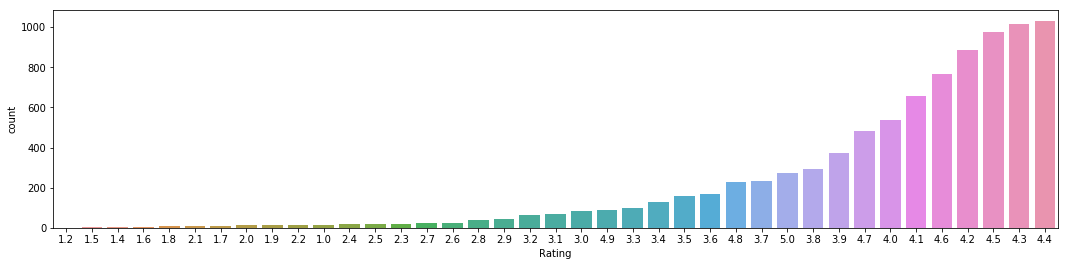

In [338]:
plt.figure(figsize=(18,4))
sns.countplot(data=app_data,x='Rating',order=reversed(app_data.Rating.value_counts().index))


# PRICE

Removed $ sign, then converted to float.    
Avg price is $1, from 0 to $400.

In [38]:
app_data.Price.value_counts()
#remove $ from the beginning
app_data.Price[app_data.Price!='0']=app_data.Price.str.slice(1,)

#change data type from string to float
app_data.Price=app_data.Price.astype('float')
app_data.Price.dtype

dtype('float64')

count    10358.000000
mean         1.030701
std         16.277843
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

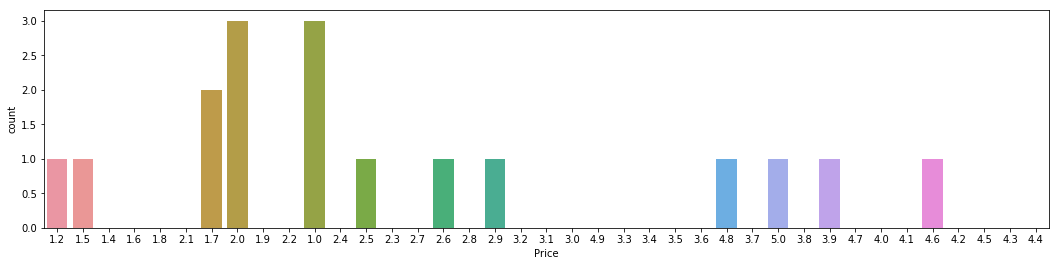

In [303]:
plt.figure(figsize=(18,4))
sns.countplot(data=app_data,x='Price',order=reversed(app_data.Rating.value_counts().index))
app_data["Price"].describe()   

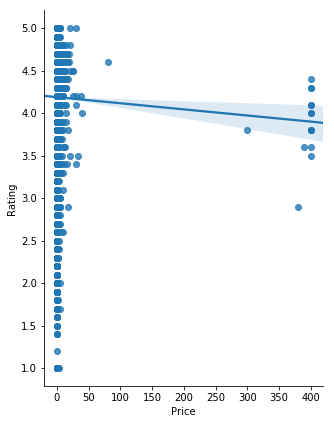

In [334]:
sns.pairplot(updated_app_data, x_vars=['Price'], y_vars='Rating', height=6, aspect=0.8, kind='reg')

There may some fake apps whose price >$100. These might be cleaned next time.

In [337]:
app_data[app_data.Price>=100]

,App,Rating,Reviews,Size,Installs,Price,Updated_Year,Updated_Year_Num,Category,Type,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),4.3,6,1500000.0,100+,399.99,2018,0,FAMILY,Paid,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,3.8,718,26000000.0,"10,000+",399.99,2018,0,LIFESTYLE,Paid,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,3.6,275,7300000.0,"10,000+",400.00,2018,0,LIFESTYLE,Paid,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,3.8,3547,1800000.0,"100,000+",399.99,2018,0,LIFESTYLE,Paid,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,4.0,856,8700000.0,"10,000+",399.99,2018,0,FAMILY,Paid,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,3.8,411,2600000.0,"10,000+",299.99,2018,0,LIFESTYLE,Paid,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,4.1,1867,4700000.0,"50,000+",399.99,2017,1,FINANCE,Paid,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,2.9,41,2900000.0,"1,000+",379.99,2018,0,LIFESTYLE,Paid,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,3.8,93,22000000.0,"1,000+",399.99,2017,1,FINANCE,Paid,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),3.5,472,965000.0,"5,000+",399.99,2017,1,FINANCE,Paid,Everyone,Finance,2017-05-01,3.4,4.4 and up


# SIZE

In [39]:
app_data.Size=app_data.Size.str.replace('k','e+3')
app_data.Size=app_data.Size.str.replace('M','e+6')
app_data.Size=app_data.Size.replace('Varies with device',np.nan)
app_data.Size=app_data.Size.astype('float')

In [40]:
def is_covertible(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
app_data_size=app_data.Size.apply(lambda x: is_covertible(x))
app_data.Size[~app_data_size].value_counts()

Series([], Name: Size, dtype: int64)

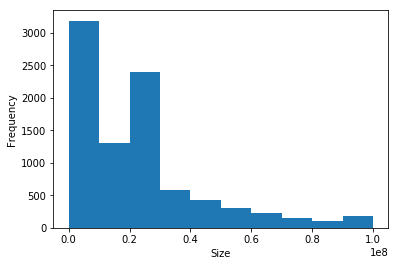

In [89]:
sns.mpl.pyplot.hist(updated_app_data.Size)
sns.mpl.pyplot.xlabel("Size")
sns.mpl.pyplot.ylabel("Frequency");


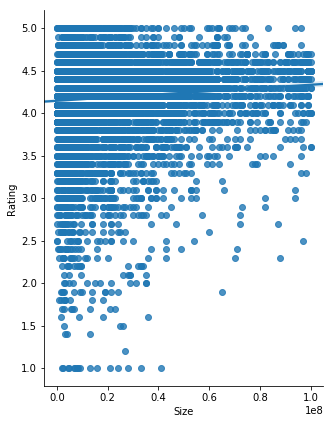

In [340]:
sns.pairplot(updated_app_data, x_vars=['Size'], y_vars='Rating', height=6, aspect=0.8, kind='reg')

# Reviews

Standart deviation of reviews is large.

In [41]:
app_data.Reviews.value_counts()
app_data.Reviews.count().max()
app_data.Reviews.fillna('').str.isnumeric().sum()
#10840
#app_data[~app_data.Reviews.str.isnumeric()]
app_data.Reviews=app_data.Reviews.astype('int')


In [346]:
pd.set_option('float_format', '{:f}'.format)
app_data.Reviews.describe()

count      10358.000000
mean      405865.424889
std      2696650.591550
min            0.000000
25%           32.000000
50%         1678.500000
75%        46404.250000
max     78158306.000000
Name: Reviews, dtype: float64

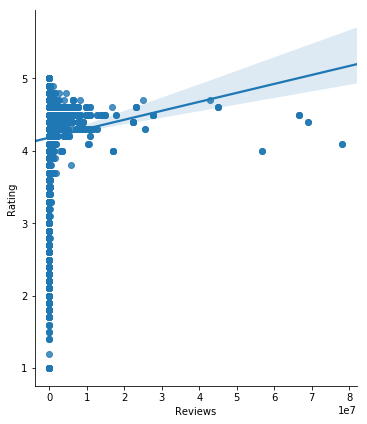

In [342]:
sns.pairplot(updated_app_data, x_vars=['Reviews'], y_vars='Rating', height=6, aspect=0.9, kind='reg')

# Updated date

Created year column and convert it into a "years_since_updated" numeric value
Eg: 2018 to 0 , 2017 to 1 .... 2018 to 8

More than %83 of apps were updated in last 2 years. Not expecting a significant impact on rating. 

In [349]:
app_data['Last_Updated']=pd.to_datetime(app_data.Last_Updated)
app_data["Updated_Year"]=app_data.Last_Updated.dt.year

#return years to numeric values
app_data['Updated_Year_Num']=2018-app_data.Updated_Year

# print(updated_app_data.Updated_Year.value_counts())
zip(app_data.Updated_Year_Num.unique(),app_data.Updated_Year_Num.value_counts(),app_data.Updated_Year_Num.value_counts()/app_data.shape[0])

[(0, 6935L, 0.6695307974512454),
 (1, 1826L, 0.17628885885306045),
 (4, 789L, 0.07617300637188647),
 (2, 454L, 0.043830855377486),
 (3, 204L, 0.01969492179957521),
 (5, 108L, 0.010426723305657463),
 (6, 26L, 0.0025101370921027225),
 (7, 15L, 0.0014481560146746477),
 (8, 1L, 9.654373431164318e-05)]

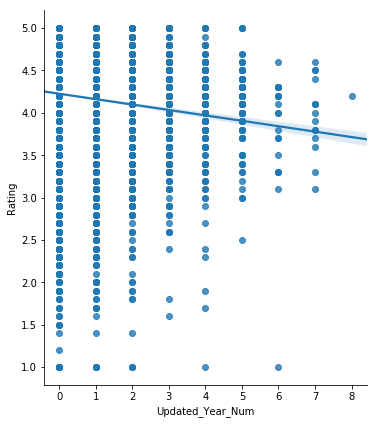

In [350]:
sns.pairplot(updated_app_data, x_vars=['Updated_Year_Num'], y_vars='Rating', height=6, aspect=0.9, kind='reg')

In [43]:
app_data.dtypes

App                         object
Category                    object
Rating                      object
Reviews                      int32
Size                       float64
Installs                    object
Type                        object
Price                      float64
Content_Rating              object
Genres                      object
Last_Updated        datetime64[ns]
Current_Ver                 object
Android_Ver                 object
Updated_Year                 int64
Updated_Year_Num             int64
dtype: object

Reorder columns: First continuous and then categorical variables.

In [44]:
#column place changing according to its type
app_data_col=app_data.columns.tolist()
print( 'BEFORE',app_data_col)
app_data_new_col =app_data_col[0:1]+app_data_col[2:6]+app_data_col[7:8]+app_data_col[-2:]+app_data_col[1:2]+app_data_col[6:7]+app_data_col[8:-2]
print( 'AFTER',app_data_new_col)
app_data=app_data[app_data_new_col]
app_data.head()

('BEFORE', ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver', 'Updated_Year', 'Updated_Year_Num'])
('AFTER', ['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Updated_Year', 'Updated_Year_Num', 'Category', 'Type', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver'])


,App,Rating,Reviews,Size,Installs,Price,Updated_Year,Updated_Year_Num,Category,Type,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,"10,000+",0.0,2018,0,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14000000.0,"500,000+",0.0,2018,0,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,"5,000,000+",0.0,2018,0,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25000000.0,"50,000,000+",0.0,2018,0,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,"100,000+",0.0,2018,0,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


# Correlations

In [356]:
con_correlations = app_data.corr()
con_correlations

,Rating,Reviews,Size,Price,Updated_Year,Updated_Year_Num
Rating,1.000000,0.068738,0.082336,-0.022301,0.136134,-0.136134
Reviews,0.068738,1.000000,0.237897,-0.009416,0.075734,-0.075734
Size,0.082336,0.237897,1.000000,-0.023760,0.217295,-0.217295
Price,-0.022301,-0.009416,-0.023760,1.000000,-0.005630,0.005630
Updated_Year,0.136134,0.075734,0.217295,-0.005630,1.000000,-1.000000
Updated_Year_Num,-0.136134,-0.075734,-0.217295,0.005630,-1.000000,1.000000


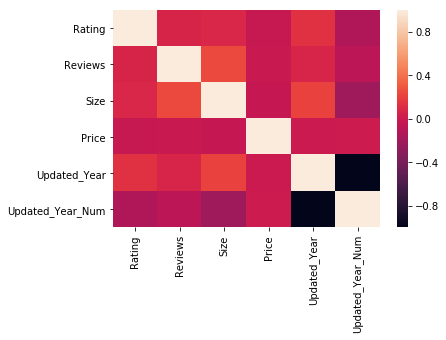

In [357]:
sns.heatmap(con_correlations)

# NEW TABLE

In [46]:
updated_app_data=app_data
print(updated_app_data.shape)
updated_app_data.head()

(10358, 15)


,App,Rating,Reviews,Size,Installs,Price,Updated_Year,Updated_Year_Num,Category,Type,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,"10,000+",0.0,2018,0,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14000000.0,"500,000+",0.0,2018,0,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,"5,000,000+",0.0,2018,0,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25000000.0,"50,000,000+",0.0,2018,0,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,"100,000+",0.0,2018,0,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


# CONTENT RATING

Combined some group. Eg: Adults only 18+ --> Mature 17+ and , then created dummy variables.
80% of overall content belongs to everyone. Not expecting a significant impact on rating. 



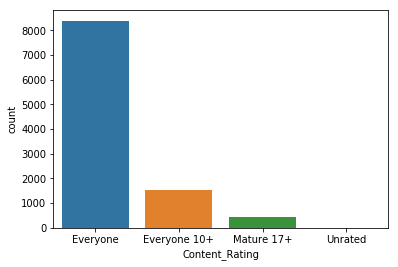

In [320]:
sns.countplot(x='Content_Rating',data=app_data)

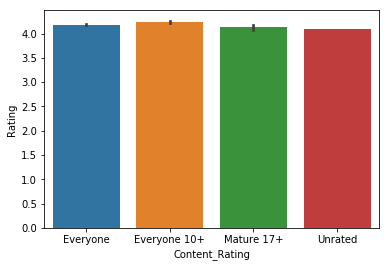

In [321]:
sns.barplot(x='Content_Rating', y='Rating', data=app_data)

In [365]:
print(app_data.Content_Rating.value_counts() )
app_data.Content_Rating.value_counts()/app_data.shape[0]

Everyone        8383
Everyone 10+    1523
Mature 17+       450
Unrated            2
Name: Content_Rating, dtype: int64


Everyone       0.809326
Everyone 10+   0.147036
Mature 17+     0.043445
Unrated        0.000193
Name: Content_Rating, dtype: float64

In [47]:
#1) Teen group combined to Everyone 10+
updated_app_data.loc[updated_app_data['Content_Rating']=='Teen','Content_Rating']='Everyone 10+'

#2)Adults only 18+ group combined to Mature 17+
updated_app_data.loc[updated_app_data['Content_Rating']=='Adults only 18+','Content_Rating']='Mature 17+'

Content_Rating_Dummies=pd.get_dummies(updated_app_data.Content_Rating,prefix='Content',drop_first=True).astype('int')
Content_Rating_Dummies

#concat tables
updated_app_data=pd.concat([updated_app_data,Content_Rating_Dummies],axis=1)
updated_app_data.drop('Content_Rating',inplace=True,axis=1)


# TYPE

93% of apps are free.

Free    9592
Paid     765
Name: Type, dtype: int64
Free    0.926047
Paid    0.073856
Name: Type, dtype: float64


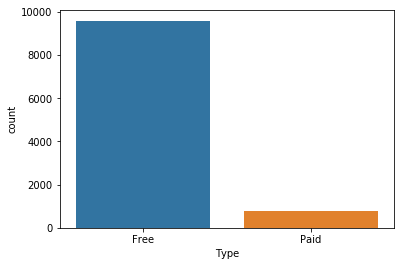

In [314]:
print(app_data.Type.value_counts())
print(app_data.Type.value_counts()/app_data.shape[0])
sns.countplot(x='Type',data=app_data)

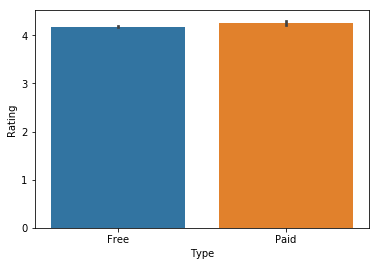

In [377]:
sns.barplot(x='Type', y='Rating', data=app_data)

In [48]:
print(updated_app_data.Type.value_counts())
type_dummies=pd.get_dummies(updated_app_data.Type,drop_first=True,prefix='Type').astype('int')

#concat tables
updated_app_data=pd.concat([updated_app_data,type_dummies],axis=1)
updated_app_data.drop('Type', inplace=True,axis=1)


Free    9592
Paid     765
Name: Type, dtype: int64


# Category

There are 34 Category groups, too high. The data size is small. It is hard to see any impact on rating. Group number might have decreased to 2-3.

In [376]:
cat=app_data.Category.unique()
cat.shape

(34L,)

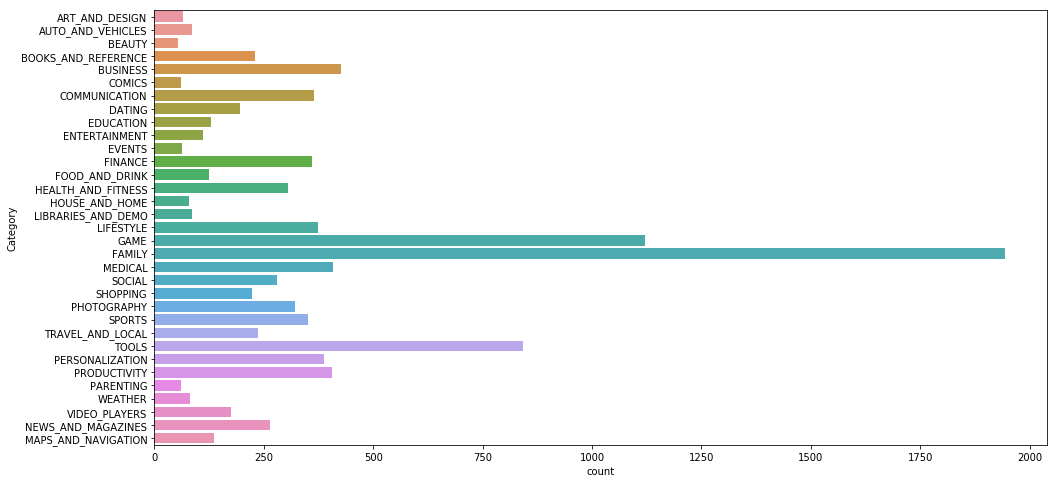

In [318]:
plt.figure(figsize=(16,8))
sns.countplot(y='Category',data=app_data)
plt.show()

In [49]:
print(app_data.Category.value_counts())
category_dummies=pd.get_dummies(updated_app_data.Category,drop_first=True,prefix='Category').astype('int')

#concat tables
updated_app_data=pd.concat([updated_app_data,category_dummies],axis=1)
updated_app_data.drop('Category', inplace=True,axis=1 )

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64


# Genres

There are 120 Genre groups, too high. The data size is small. It is hard to see any impact on rating. Group number might have decreased to 2-3.

Created dummy variable per group.

In [379]:
cat=app_data.Genres.unique()
cat.shape

(120L,)

In [50]:
print(updated_app_data.Genres.value_counts())
genres_dummies=updated_app_data.Genres.str.get_dummies(sep=';')
genres_dummies.head()
genres_col=genres_dummies.columns.tolist()
genres_col=['Genres_'+ col for col in genres_col]
genres_col
genres_dummies.columns=genres_col
genres_dummies.head()

#concat tables
updated_app_data=pd.concat([updated_app_data,genres_dummies],axis=1)
updated_app_data.drop('Genres',axis=1, inplace=True)
updated_app_data.head()


Tools                                  842
Entertainment                          588
Education                              527
Business                               427
Medical                                408
Productivity                           407
Personalization                        388
Lifestyle                              372
Communication                          366
Sports                                 364
Finance                                360
Action                                 356
Photography                            322
Health & Fitness                       306
Social                                 280
News & Magazines                       264
Travel & Local                         236
Books & Reference                      230
Shopping                               224
Arcade                                 218
Simulation                             199
Dating                                 196
Casual                                 191
Video Playe

,App,Rating,Reviews,Size,Installs,Price,Updated_Year,Updated_Year_Num,Last_Updated,Current_Ver,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,"10,000+",0.0,2018,0,2018-01-07,1.0.0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14000000.0,"500,000+",0.0,2018,0,2018-01-15,2.0.0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,"5,000,000+",0.0,2018,0,2018-08-01,1.2.4,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25000000.0,"50,000,000+",0.0,2018,0,2018-06-08,Varies with device,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,"100,000+",0.0,2018,0,2018-06-20,1.1,...,0,0,0,0,0,0,0,0,0,0


# Installs

Remove , and + s Eg: 5,000,000+ => 5000000 Then conert to integer. Additionally, created dummy variables. 

In [741]:
print(updated_app_data.Installs.value_counts())


1000000       1488
10000000      1132
100000        1129
10000         1033
1000           891
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: Installs, dtype: int64


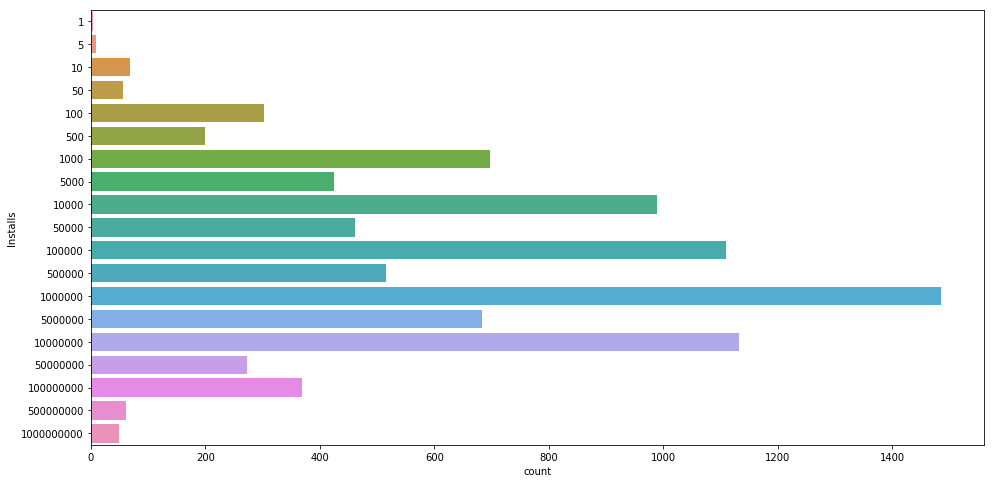

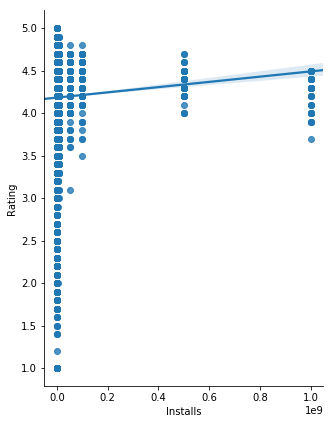

In [332]:
plt.figure(figsize=(16,8))
sns.countplot(y='Installs',data=updated_app_data)
plt.show()

sns.pairplot(updated_app_data, x_vars=['Installs'], y_vars='Rating', height=6, aspect=0.8, kind='reg')

In [71]:
# remove + from the end
updated_app_data.Installs[updated_app_data.Installs!='0']=app_data['Installs'].str[:-1]

# # remove , s
updated_app_data.Installs=updated_app_data.Installs.str.replace(',','')

#turn to categories as well
installs_dummies=updated_app_data.Installs.str.get_dummies(sep=';')
installs_dummies.head()

install_col=installs_dummies.columns.tolist()
install_col=['Installs_'+col for col in install_col]
install_col

installs_dummies.columns=install_col
installs_dummies.head()


#turn to numeric
app_data.Installs.str.isnumeric().count()
updated_app_data.Installs=updated_app_data.Installs.astype('int')
updated_app_data.Installs.value_counts()

# concat tables
updated_app_data=pd.concat([updated_app_data,installs_dummies],axis=1)

In [27]:
updated_app_data.Current_Ver.value_counts()

Varies with device     1459
1.0                     809
1.1                     264
1.2                     178
2.0                     151
1.3                     145
1.0.0                   136
1.0.1                   119
1.4                      88
1.5                      81
1.0.2                    80
1.6                      65
1.0.3                    62
2.1                      61
3.0                      59
1.0.4                    58
1.7                      53
2.0.0                    51
1.0.5                    50
1.1.0                    49
1.1.1                    48
1.0.6                    47
1.2.1                    46
1.2.0                    43
1.8                      42
4.0                      40
1.9                      37
2.3.2                    35
2.4                      34
1.0.7                    34
                       ... 
3.21.324                  1
3.0.58                    1
v1.8b22p13                1
9.7.6                     1
2.14.36             

# Missing Data Control

Assigned mean to null values at Size. Removed the rest. Because, the target is predicting Rating. Null Ratings does not work.

In [72]:
#null values
updated_app_data.isnull().sum().sort_values(ascending=False)


Size                            1526
Rating                          1465
Current_Ver                        8
Android_Ver                        2
Installs_500000000                 0
Category_TOOLS                     0
Category_SPORTS                    0
Category_SOCIAL                    0
Category_SHOPPING                  0
Category_PRODUCTIVITY              0
Category_PHOTOGRAPHY               0
Category_VIDEO_PLAYERS             0
Category_PERSONALIZATION           0
Category_PARENTING                 0
Category_NEWS_AND_MAGAZINES        0
Category_MEDICAL                   0
Category_MAPS_AND_NAVIGATION       0
Category_TRAVEL_AND_LOCAL          0
Genres_Action                      0
Category_WEATHER                   0
Category_LIBRARIES_AND_DEMO        0
Genres_Action & Adventure          0
Genres_Adventure                   0
Genres_Arcade                      0
Genres_Art & Design                0
Genres_Auto & Vehicles             0
Genres_Beauty                      0
G

# Missing values

In [73]:
updated_app_data.isnull().sum().sort_values(ascending=False)
updated_app_data.shape

(10358, 120)

In [48]:
#delete null Ratings, can be done  rows below
#updated_app_data = updated_app_data[np.isfinite(updated_app_data['Rating'])]

In [74]:
updated_app_data.Size=updated_app_data.Size.replace(np.nan,np.mean(updated_app_data.Size))


In [82]:
updated_app_data.dropna(inplace=True)

In [76]:
drop_cols=['Updated_Year','Last_Updated', 'Current_Ver', 'Android_Ver','App']
updated_app_data.drop(drop_cols,axis=1, inplace=True)

In [44]:
# #column place changing according to its type
# app_data_col=updated_app_data.columns.tolist()
# #print( 'BEFORE',app_data_col)
# app_data_new_col =app_data_col[0:5]+app_data_col[-1:]+app_data_col[5:-1]
# print( 'AFTER',app_data_new_col)
# updated_app_data=updated_app_data[app_data_new_col]

('AFTER', ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Installs_500000000', 'Updated_Year_Num', 'Content_Everyone 10+', 'Content_Mature 17+', 'Content_Unrated', 'Type_Paid', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME', 'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING', 'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL', 'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL', 'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Genres_Action', 'Genres_Action & Adventure', 'Genres_Adve

In [90]:
updated_app_data.dtypes

Rating                            float64
Reviews                             int32
Size                              float64
Installs                            int32
Price                             float64
Updated_Year_Num                    int64
Content_Everyone 10+                int32
Content_Mature 17+                  int32
Content_Unrated                     int32
Type_Paid                           int32
Category_AUTO_AND_VEHICLES          int32
Category_BEAUTY                     int32
Category_BOOKS_AND_REFERENCE        int32
Category_BUSINESS                   int32
Category_COMICS                     int32
Category_COMMUNICATION              int32
Category_DATING                     int32
Category_EDUCATION                  int32
Category_ENTERTAINMENT              int32
Category_EVENTS                     int32
Category_FAMILY                     int32
Category_FINANCE                    int32
Category_FOOD_AND_DRINK             int32
Category_GAME                     

In [99]:
correlations=updated_app_data.corr()
correlations

,Rating,Reviews,Size,Installs,Price,Updated_Year_Num,Content_Everyone 10+,Content_Mature 17+,Content_Unrated,Type_Paid,...,Installs_1000000000,Installs_5,Installs_50,Installs_500,Installs_5000,Installs_50000,Installs_500000,Installs_5000000,Installs_50000000,Installs_500000000
Rating,1.000000,0.068730,0.077237,0.050908,-0.022318,-0.136298,0.045244,-0.026249,-0.001779,0.038451,...,0.010469,0.025780,0.035320,-0.002840,-0.071164,-0.061447,-0.006876,0.028517,0.054648,0.025411
Reviews,0.068730,1.000000,0.127786,0.633423,-0.009561,-0.078936,0.099958,-0.008149,-0.001723,-0.042841,...,0.504704,-0.005183,-0.012964,-0.024638,-0.036476,-0.037998,-0.039532,-0.036715,0.047530,0.267656
Size,0.077237,0.127786,1.000000,0.076010,-0.026277,-0.210727,0.209287,0.034152,-0.007981,-0.023633,...,0.013371,-0.021888,-0.022031,-0.070381,-0.085107,-0.038933,0.008515,0.073518,0.069239,0.036848
Installs,0.050908,0.633423,0.076010,1.000000,-0.011332,-0.091077,0.069394,-0.015685,-0.002020,-0.051533,...,0.847636,-0.006080,-0.015207,-0.028901,-0.042785,-0.044533,-0.045929,-0.038403,0.068902,0.465258
Price,-0.022318,-0.009561,-0.026277,-0.011332,1.000000,0.000819,-0.010717,-0.009816,-0.000631,0.218966,...,-0.004430,-0.001894,-0.001981,-0.002962,0.032809,0.004473,-0.013615,-0.017167,-0.010572,-0.004946
Updated_Year_Num,-0.136298,-0.078936,-0.210727,-0.091077,0.000819,1.000000,-0.038589,-0.052463,0.051353,0.167184,...,-0.039915,-0.013897,0.026126,0.031326,0.064633,0.071496,-0.010816,-0.067597,-0.063052,-0.044565
Content_Everyone 10+,0.045244,0.099958,0.209287,0.069394,-0.010717,-0.038589,1.000000,-0.094855,-0.004552,-0.022107,...,0.056106,-0.013663,-0.022400,-0.041860,-0.052516,-0.005165,0.017161,0.038222,0.058950,0.001933
Content_Mature 17+,-0.026249,-0.008149,0.034152,-0.015685,-0.009816,-0.052463,-0.094855,1.000000,-0.002345,-0.026299,...,-0.016459,-0.007038,-0.017602,-0.004584,-0.024517,-0.010775,0.041153,-0.005648,-0.002080,-0.005443
Content_Unrated,-0.001779,-0.001723,-0.007981,-0.002020,-0.000631,0.051353,-0.004552,-0.002345,1.000000,-0.002882,...,-0.000790,-0.000338,-0.000845,-0.001606,-0.002377,0.045353,-0.002631,-0.003061,-0.001885,-0.000882
Type_Paid,0.038451,-0.042841,-0.023633,-0.051533,0.218966,0.167184,-0.022107,-0.026299,-0.002882,1.000000,...,-0.020232,-0.008651,0.057041,0.067081,0.074566,0.016654,-0.044551,-0.078399,-0.048280,-0.022589


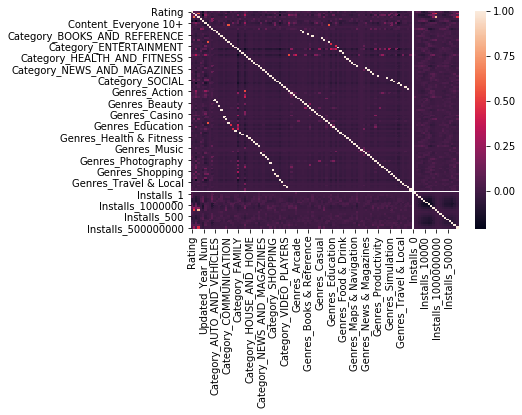

In [100]:
sns.heatmap(correlations)

In [101]:
updated_app_data.Installs_1.value_counts()

0    8884
1       3
Name: Installs_1, dtype: int64

# Feature Selection

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [123]:
X=updated_app_data.drop("Rating",axis=1)
y=updated_app_data['Rating']
y=y.astype('int')

In [124]:
size=0.20
X_train, X_test, y_train ,y_test=train_test_split(X,y,test_size=size,random_state=0)
print(X_train.shape[0], X_test.shape[0], y_train.shape[0] ,y_test.shape[0])

(7109, 1778, 7109L, 1778L)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()

X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

X_train

# Multiple Regression

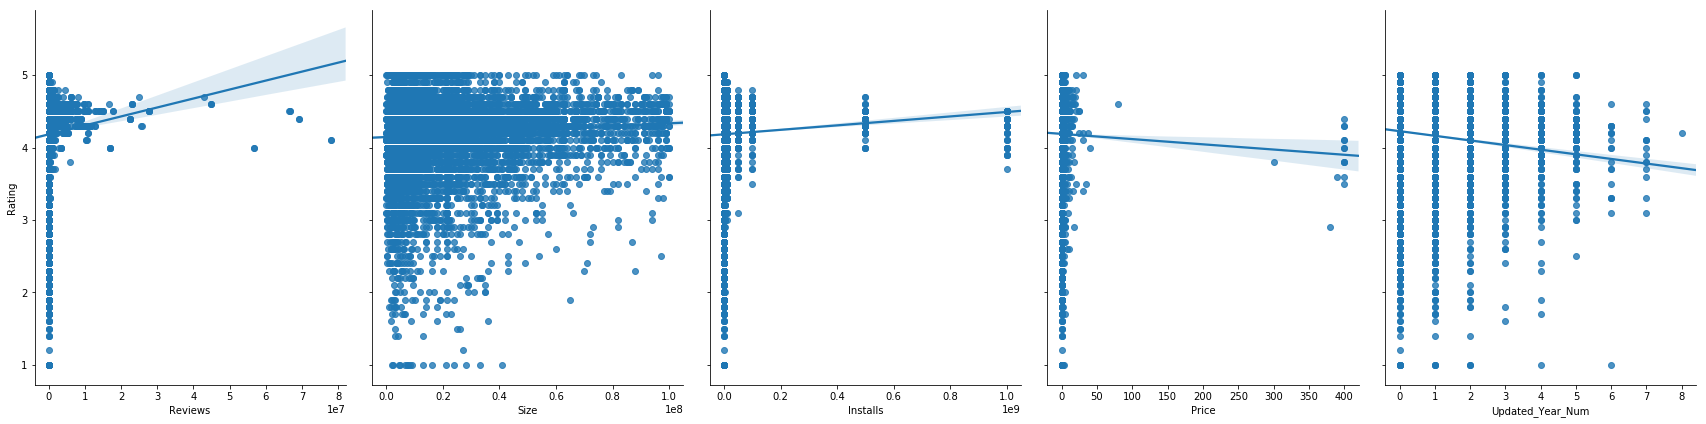

In [105]:
sns.pairplot(updated_app_data, x_vars=['Reviews','Size' ,'Installs' ,'Price' ,'Updated_Year_Num'], y_vars='Rating', height=6, aspect=0.8, kind='reg')

In [145]:
mult_feature_cols = ['Reviews','Size' ,'Installs' ,'Price' ,'Updated_Year_Num','Content_Everyone 10+','Content_Mature 17+','Content_Unrated','Type_Paid']
X_mult=updated_app_data[mult_feature_cols]
y_mult=updated_app_data['Rating']
y_mult=y_mult.astype('int')

y_mult.head()

0    4
1    3
2    4
3    4
4    4
Name: Rating, dtype: int32

In [146]:
size=0.20
X_train_mult, X_test_mult, y_train_mult ,y_test_mult=train_test_split(X_mult,y_mult,test_size=size,random_state=0)
print(X_train_mult.shape[0], X_test_mult.shape[0], y_train_mult.shape[0] ,y_test_mult.shape[0])

(7109, 1778, 7109L, 1778L)


In [149]:
X_train_mult.head()  , y_train_mult.head()

(      Reviews          Size  Installs  Price  Updated_Year_Num  \
 6296   341234  3.000000e+07  10000000   0.00                 0   
 8449    28107  5.700000e+06    500000   2.99                 0   
 4782    44636  2.128572e+07   1000000   0.00                 1   
 354    437674  2.128572e+07  10000000   0.00                 0   
 9289       13  1.000000e+07       500   0.00                 2   
 
       Content_Everyone 10+  Content_Mature 17+  Content_Unrated  Type_Paid  
 6296                     1                   0                0          0  
 8449                     0                   0                0          1  
 4782                     0                   0                0          0  
 354                      0                   0                0          0  
 9289                     0                   0                0          0  ,
 6296    4
 8449    4
 4782    3
 354     4
 9289    3
 Name: Rating, dtype: int32)

In [151]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()

sc_X_train_mult=sc_X.fit_transform(X_train_mult)
sc_X_test_mult=sc_X.fit_transform(X_test_mult)

sc_X_train_mult

C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **f

array([[-0.05001534,  0.35930148, -0.07623277, ..., -0.22515472,
         0.        , -0.26969012],
       [-0.15063745, -0.78500371, -0.18803422, ..., -0.22515472,
         0.        ,  3.70795937],
       [-0.14532592, -0.05106059, -0.18214993, ..., -0.22515472,
         0.        , -0.26969012],
       ...,
       [-0.08399703,  1.91329619, -0.07623277, ..., -0.22515472,
         0.        , -0.26969012],
       [-0.14931414, -0.90273058, -0.18214993, ..., -0.22515472,
         0.        , -0.26969012],
       [-0.12278285, -0.05106059, -0.13507564, ..., -0.22515472,
         0.        , -0.26969012]])

In [152]:
#without scaling
linreg=LinearRegression()
linreg.fit(X_train_mult,y_train_mult)

coeffs = linreg.coef_
intercept = linreg.intercept_

list(zip(mult_feature_cols, linreg.coef_))

#r^2
y_mult_pred = linreg.predict(X_test_mult)
print(metrics.r2_score(y_test_mult, y_mult_pred))
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_test_mult, y_mult_pred)))

y_training_pred = linreg.predict(X_train_mult)
metrics.r2_score(y_train_mult, y_training_pred)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train_mult, y_training_pred)))


0.023676076545492086
('Training set RMSE:', 0.5427630313055046)
('Training set RMSE:', 0.5689240357698234)


In [154]:
#with scaling 
linreg_sc=LinearRegression()
linreg_sc.fit(sc_X_train_mult,y_train_mult)

coeffs = linreg_sc.coef_
intercept = linreg_sc.intercept_

list(zip(mult_feature_cols, linreg_sc.coef_))

#r^2
sc_y_mult_pred = linreg_sc.predict(sc_X_test_mult)
print(metrics.r2_score(y_test_mult, sc_y_mult_pred))
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_test_mult, sc_y_mult_pred)))

sc_y_training_pred = linreg_sc.predict(sc_X_train_mult)
metrics.r2_score(y_train_mult, sc_y_training_pred)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train_mult, sc_y_training_pred)))


0.02302906928945725
('Training set RMSE:', 0.5429428453253569)
('Training set RMSE:', 0.5689240357698234)


# New try for linear regression

In [386]:
mult_feature_cols1 = ['Reviews','Size' ,'Installs']
X_mult1=updated_app_data[mult_feature_cols1]
y_mult1=updated_app_data['Rating']
#y_mult1=y_mult.astype('int')


In [387]:
size=0.20
X_train_mult1, X_test_mult1, y_train_mult1 ,y_test_mult1=train_test_split(X_mult1,y_mult1,test_size=size,random_state=0)
print(X_train_mult1.shape[0], X_test_mult1.shape[0], y_train_mult1.shape[0] ,y_test_mult1.shape[0])

(7109, 1778, 7109L, 1778L)


In [388]:
from sklearn.preprocessing import StandardScaler
sc_X1=StandardScaler()

sc_X_train_mult1=sc_X1.fit_transform(X_train_mult1)
sc_X_test_mult1=sc_X1.fit_transform(X_test_mult1)

sc_X_train_mult1

C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.05001534,  0.35930148, -0.07623277],
       [-0.15063745, -0.78500371, -0.18803422],
       [-0.14532592, -0.05106059, -0.18214993],
       ...,
       [-0.08399703,  1.91329619, -0.07623277],
       [-0.14931414, -0.90273058, -0.18214993],
       [-0.12278285, -0.05106059, -0.13507564]])

In [393]:
#with scaling 
linreg_sc1=LinearRegression()
linreg_sc1.fit(sc_X_train_mult1,y_train_mult1)

coeffs1 = linreg_sc1.coef_
intercept1 = linreg_sc1.intercept_

list(zip(mult_feature_cols1, linreg_sc1.coef_))

#r^2
sc_y_mult_pred1 = linreg_sc1.predict(sc_X_test_mult1)
print(metrics.r2_score(y_test_mult1, sc_y_mult_pred1))
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_test_mult1, sc_y_mult_pred1)))

sc_y_training_pred1 = linreg_sc1.predict(sc_X_train_mult1)
metrics.r2_score(y_train_mult1, sc_y_training_pred1)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train_mult1, sc_y_training_pred1)))


0.007152240144267741
('Training set RMSE:', 0.5021941020669145)
('Training set RMSE:', 0.5248658608678702)


# Random Forests Model

In [163]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.externals.six import StringIO
from sklearn.metrics import mean_squared_error, accuracy_score

In [205]:

# updated_app_data.columns.tolist()[1:95]
#[1:-73] + to exclude installs and genre categories

X_rf=updated_app_data[updated_app_data.columns.tolist()[1:-73]]
y_rf=updated_app_data.Rating
# y_rf=y_rf.astype('int')

y_rf.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [206]:
size=0.20
X_train_rf, X_test_rf, y_train_rf ,y_test_rf=train_test_split(X_rf,y_rf,test_size=size,random_state=1)
print(X_train_mult.shape[0], X_test_mult.shape[0], y_train_mult.shape[0] ,y_test_mult.shape[0])

(7109, 1778, 7109L, 1778L)


# Single Tree

('Decision Tree Train/Test RMSE:', 1, 0.5122018232290181, ' ', 0.506140432995555)
('Decision Tree Train/Test RMSE:', 2, 0.5034709565408105, ' ', 0.5011784291891954)
('Decision Tree Train/Test RMSE:', 3, 0.4982529360243172, ' ', 0.5047995354508101)
('Decision Tree Train/Test RMSE:', 4, 0.4921089452083853, ' ', 0.5042603648578409)
('Decision Tree Train/Test RMSE:', 5, 0.48274028607849856, ' ', 0.5007471727088556)
('Decision Tree Train/Test RMSE:', 6, 0.4741303199604173, ' ', 0.5041055001452464)
('Decision Tree Train/Test RMSE:', 7, 0.46394183109125703, ' ', 0.5019699644871966)
('Decision Tree Train/Test RMSE:', 8, 0.4535222941054874, ' ', 0.5059074174475139)
('Decision Tree Train/Test RMSE:', 9, 0.44087325422968815, ' ', 0.5243422207991708)
('Decision Tree Train/Test RMSE:', 10, 0.4231910883803107, ' ', 0.5329994818177628)
('Decision Tree Train/Test RMSE:', 11, 0.4066219050343779, ' ', 0.5467202332155308)
('Decision Tree Train/Test RMSE:', 12, 0.389366521418975, ' ', 0.5653374689186459)


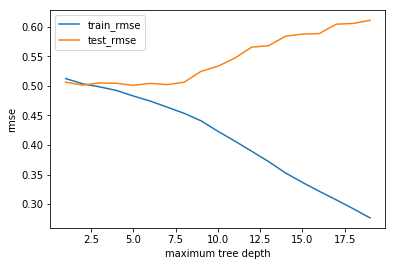

In [394]:
depths = range(1,20)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth,random_state=10)
    decision_tree.fit(X_train_rf,y_train_rf)
    curr_train_rmse = np.sqrt(mean_squared_error(y_train_rf,decision_tree.predict(X_train_rf)))
    curr_test_rmse = np.sqrt(mean_squared_error(y_test_rf,decision_tree.predict(X_test_rf)))
    print("Decision Tree Train/Test RMSE:",depth,curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths,train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(depths,test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse")
sns.mpl.pyplot.legend()

In [208]:
# max_depth=8 was best, so fit a tree using that parameter
best_single_tree = DecisionTreeRegressor(max_depth=8, random_state=1)
best_single_tree.fit(X_train_rf,y_train_rf)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

# Evaluating Feature Importance

In [209]:
pd.DataFrame({'feature':updated_app_data.columns.tolist()[1:-73], 'importance':best_single_tree.feature_importances_})

,feature,importance
0,Reviews,0.389741
1,Size,0.112353
2,Installs,0.209276
3,Price,0.027979
4,Updated_Year_Num,0.086093
5,Content_Everyone 10+,0.003143
6,Content_Mature 17+,0.007194
7,Content_Unrated,0.000000
8,Type_Paid,0.033175
9,Category_AUTO_AND_VEHICLES,0.001196


In [218]:
# use fitted model to make predictions on testing data
y_pred_rf = best_single_tree.predict(X_test_rf)
print(y_pred_rf)
print(y_pred_rf.mean())
print ("RMSE", np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)))

[4.00542299 4.26538462 4.20560748 ... 4.12207792 4.19410112 4.55098039]
4.188615490935151
('RMSE', 0.5058907627880592)


### Bagged Trees

Bagging is a general purpose procedure for reducing the variance of a machine learning method

In [226]:
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=1234)
# fit and predict
bagreg.fit(X_train_rf, y_train_rf)
y_pred_rf_bag = bagreg.predict(X_test_rf)
y_pred_rf_bag

array([3.8694, 4.2796, 4.3402, ..., 4.1316, 4.0722, 4.3768])

In [224]:
# calculate test set RMSE
np.sqrt(mean_squared_error(y_test_rf, y_pred_rf_bag))

0.49589905971327597

In [225]:
# compute the out-of-bag R-squared score  for b=500
bagreg.oob_score_

0.15246457345465625

### Random Forests

In [229]:
#Random forest of 500 trees
rf = RandomForestRegressor(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf_rf = rf.predict(X_test_rf)


# calculate test set RMSE
np.sqrt(mean_squared_error(y_test_rf, y_pred_rf_rf))

0.4958761155091911

In [231]:
print("Single Tree RMSE:",np.sqrt(mean_squared_error(y_test_rf,y_pred_rf)))
print("Bag RMSE:",np.sqrt(mean_squared_error(y_test_rf,y_pred_rf_bag)))
print("Random Forest RMSE:",np.sqrt(mean_squared_error(y_test_rf, y_pred_rf_rf)))

('Single Tree RMSE:', 0.5058907627880592)
('Bag RMSE:', 0.4958390950425801)
('Random Forest RMSE:', 0.4958761155091911)


# Tuning Random Forests

In [232]:
# list of values to try for n_estimators
estimator_range = range(20, 500, 20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    rfreg.fit(X_train_rf, y_train_rf)
    preds = rfreg.predict(X_test_rf)
    rmse = np.sqrt(mean_squared_error(y_test_rf,preds))
    RMSE_scores.append(rmse)
    

C:\Users\esra.ozalp\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Text(0,0.5,'RMSE (lower is better)')

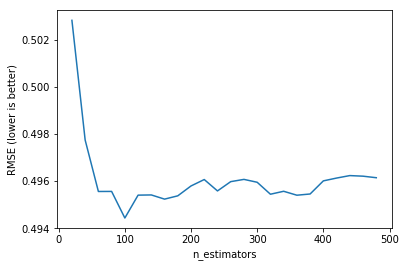

In [233]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(estimator_range, RMSE_scores)
sns.mpl.pyplot.xlabel('n_estimators')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [236]:
# list of values to try for max_features
feature_names_cem = X.columns.tolist()[1:-73]
feature_names_cem
feature_range = range(1, len(feature_names_cem)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=220, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train_rf, y_train_rf)
    preds = rfreg.predict(X_test_rf)
    rmse = np.sqrt(mean_squared_error(y_test_rf,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,'RMSE (lower is better)')

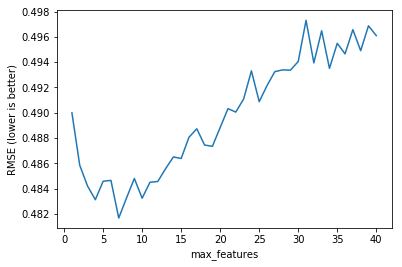

In [237]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(feature_range, RMSE_scores)
sns.mpl.pyplot.xlabel('max_features')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [238]:
RMSE_scores

[0.48999171577053413,
 0.4858500347325716,
 0.4842039632698158,
 0.4831193658866557,
 0.4845780613350649,
 0.48464598047586543,
 0.4816697051195242,
 0.48326112014132644,
 0.48479794373525636,
 0.4832382290046725,
 0.484497959767445,
 0.4845595004172245,
 0.48556811377424425,
 0.4865004500920459,
 0.48638158859034486,
 0.48805981459489234,
 0.48873013747751204,
 0.4874447254735795,
 0.487342471146922,
 0.4888371806612205,
 0.4903232648471821,
 0.49005240703585073,
 0.4910815361320493,
 0.49331340924000777,
 0.49087625312336947,
 0.49215061383694625,
 0.49325178399420805,
 0.49339118313898833,
 0.49336859958098767,
 0.4940546176426076,
 0.49731180731087665,
 0.49394598459522915,
 0.49648653481804556,
 0.49351206025224725,
 0.49549173174475974,
 0.49465893272482797,
 0.49657699704919017,
 0.49490851397991686,
 0.49687762105863603,
 0.4961015896682217]

In [239]:
rfreg_best = RandomForestRegressor(n_estimators=100, max_features=7, bootstrap=True, oob_score=True, random_state=123)
rfreg_best.fit(X_train_rf, y_train_rf)
preds = rfreg_best.predict(X_test_rf)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("Best RMSE:",rmse)

('Best RMSE:', 0.7288411280242767)


In [242]:
# compute feature importances
pd.DataFrame({'feature':X_test_rf.columns.tolist(), 'importance':rfreg_best.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
0,Reviews,0.315405
1,Size,0.247593
2,Installs,0.136597
4,Updated_Year_Num,0.059428
3,Price,0.017766
19,Category_FAMILY,0.015166
5,Content_Everyone 10+,0.014187
37,Category_TOOLS,0.012258
23,Category_HEALTH_AND_FITNESS,0.011678
26,Category_LIFESTYLE,0.011461
